In [2]:
import os
from collections import defaultdict

import fasttext
import fasttext.util

import matplotlib.pyplot as plt

In [6]:
training_path = '../semantic_learning/training_experiments/supervised/'
models = sorted([training_path + file_name for file_name in os.listdir(training_path) if file_name != '.DS_Store'])
print(models)
words = ['sunset', 'song', 'music', 'ibiza', 'people', 'school', 'laptop', 'computer', 'sand', 'sky', 'player']
print(words)

['../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-10_loss-hs_lr-0.2_ngrams-1', '../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-10_loss-hs_lr-0.5_ngrams-1', '../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-50_loss-hs_lr-0.1_ngrams-1', '../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-7_loss-hs_lr-0.1_ngrams-1', '../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-7_loss-hs_lr-0.5_ngrams-1', '../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-7_loss-hs_lr-0.5_ngrams-2', '../semantic_learning/training_experiments/supervised/fasttext_dim-200_epoch-50_loss-hs_lr-0.1_ngrams-2', '../semantic_learning/training_experiments/supervised/fasttext_dim-500_epoch-50_loss-hs_lr-0.2_ngrams-1']
['sunset', 'song', 'music', 'ibiza', 'people', 'school', 'laptop', 'computer', 'sand', 'sky', 'player']


In [7]:
neighbors = defaultdict(lambda: defaultdict(list))
for model_name in ['..//semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-7_loss-hs_lr-0.1_ngrams-1']:
    model = fasttext.load_model(model_name + '/supervised_model.bin')
    # if 'supervised' in model_name:
    #     print(model.test('../data/corpus_valid.txt'))
    for word in words:
        neighbors[model_name][word] = model.get_nearest_neighbors(word)

In [8]:
for model_name in neighbors:
    print(model_name.split('/')[-1])
    for word in words:
        print(word, [x for x in neighbors[model_name][word] if x[0] >= 0.6])
    print()

fasttext_dim-100_epoch-7_loss-hs_lr-0.1_ngrams-1
sunset [(0.8578137755393982, 'sunrise'), (0.7734695672988892, 'sunsets'), (0.7710596919059753, 'sunrises'), (0.7059510350227356, 'sun'), (0.6697677969932556, 'horizon'), (0.6607524752616882, 'milky'), (0.6595597267150879, 'dusk'), (0.6586192846298218, 'praising'), (0.6565290093421936, 'moonlight'), (0.6554563045501709, 'skies')]
song []
music [(0.6502231359481812, 'musicians'), (0.6220690011978149, 'concert')]
ibiza []
people [(0.7110589742660522, 'grandchildren'), (0.6453851461410522, 'devotees'), (0.6440896391868591, 'youths'), (0.6367863416671753, 'crowds'), (0.6307986378669739, 'refugees'), (0.6246405839920044, 'queue'), (0.6161436438560486, 'percents'), (0.6156197190284729, 'teamwork'), (0.6144832372665405, 'teenagers'), (0.6143847703933716, 'families')]
school [(0.6479821801185608, 'schools'), (0.6301422715187073, 'students')]
laptop [(0.8151301145553589, 'laptops'), (0.735193133354187, 'computer'), (0.7348428964614868, 'computers'

In [12]:
selected_model = '../semantic_learning/training_experiments/supervised/fasttext_dim-100_epoch-7_loss-hs_lr-0.1_ngrams-1/supervised_model.bin'
reduced_model = fasttext.util.reduce_model(fasttext.load_model(selected_model), 2)

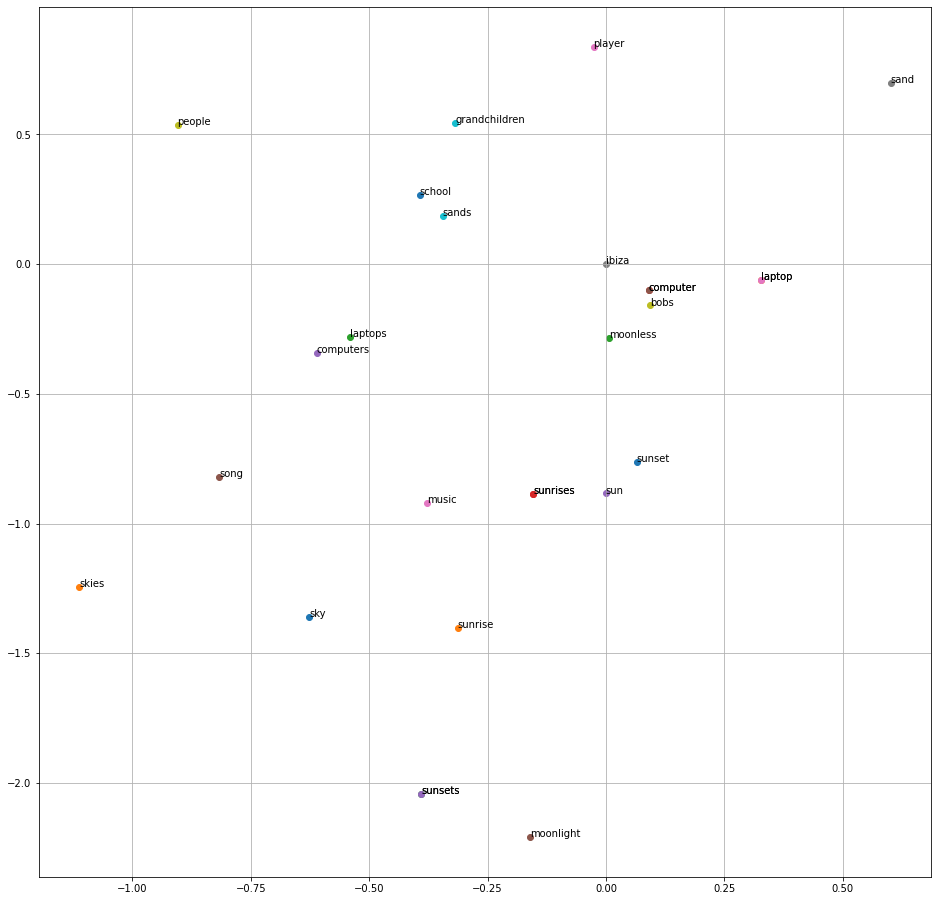

In [13]:
model = fasttext.load_model(selected_model)
plt.figure(figsize=(16, 16))
for word in words:
    plt.scatter(*reduced_model[word].tolist())
    plt.annotate(word, reduced_model[word].tolist())
    for confidence, neighbor in model.get_nearest_neighbors(word):
        if confidence >= 0.7:
            plt.scatter(*reduced_model[neighbor].tolist())
            plt.annotate(neighbor, reduced_model[neighbor].tolist())
plt.grid()
plt.show()

In [14]:
model.get_nearest_neighbors('</s>', k=10)

[(0.3755949139595032, 'razor'),
 (0.35709744691848755, 'blustery'),
 (0.3558627963066101, 'festivalcomedy'),
 (0.35475972294807434, 'loom'),
 (0.3521975576877594, 'bagpipes'),
 (0.33974704146385193, 'jetting'),
 (0.33838289976119995, 'publishing'),
 (0.33816710114479065, 'sandwiched'),
 (0.3307796120643616, 'judicial'),
 (0.33046358823776245, 'ultimate')]

In [15]:
%%timeit
model.get_nearest_neighbors(word, k=1)

1.38 ms ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
